In [3]:
import pandas as pd
from pandas import set_option
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
data=open('Pima Indians.csv',errors="ignore")
data=pd.read_csv(data)
data.rename(columns={'pregnant': 'pre', 'Plasma': 'pla', 'Diastolic':'Dia', 'skinfold':'skin', 'insulin':'insulin', 'mass':'mass', 'pedigree':'ped', 'Age':'age', 'Class':'class'}, 
            inplace=True)
data.head()

            

,pre,pla,Dia,skin,insulin,mass,ped,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.dtypes

pre          int64
pla          int64
Dia          int64
skin         int64
insulin      int64
mass       float64
ped        float64
Age          int64
class        int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pre      768 non-null    int64  
 1   pla      768 non-null    int64  
 2   Dia      768 non-null    int64  
 3   skin     768 non-null    int64  
 4   insulin  768 non-null    int64  
 5   mass     768 non-null    float64
 6   ped      768 non-null    float64
 7   Age      768 non-null    int64  
 8   class    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

pre        0
pla        0
Dia        0
skin       0
insulin    0
mass       0
ped        0
Age        0
class      0
dtype: int64

In [6]:
pd.options.display.precision=3
data.describe()


,pre,pla,Dia,skin,insulin,mass,ped,Age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [7]:
data.groupby('class').size()

class
0    500
1    268
dtype: int64

In [8]:
data.corr(method='pearson')

,pre,pla,Dia,skin,insulin,mass,ped,Age,class
pre,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
pla,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
Dia,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
ped,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
class,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


In [9]:
#The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
data.skew()

pre        0.902
pla        0.174
Dia       -1.844
skin       0.109
insulin    2.272
mass      -0.429
ped        1.920
Age        1.130
class      0.635
dtype: float64

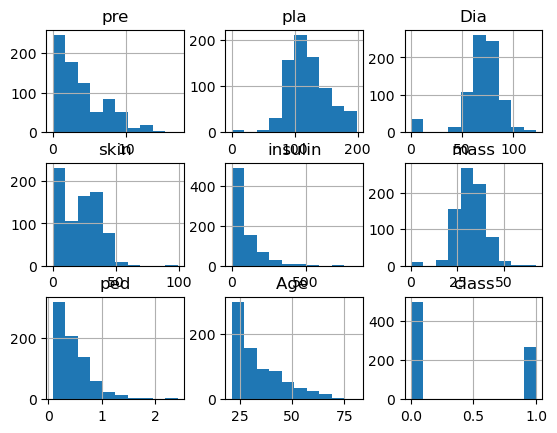

In [10]:
data.hist()
plt.show()

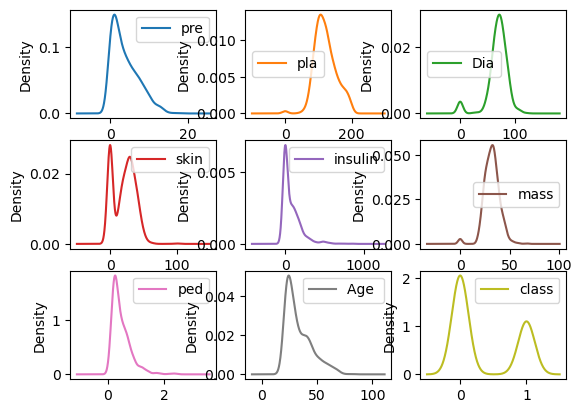

In [11]:
#Density plots are used to study the distribution of one or a few variables. Checking the distribution of your variables one by one is probably the first task you should do when you get a new dataset.
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

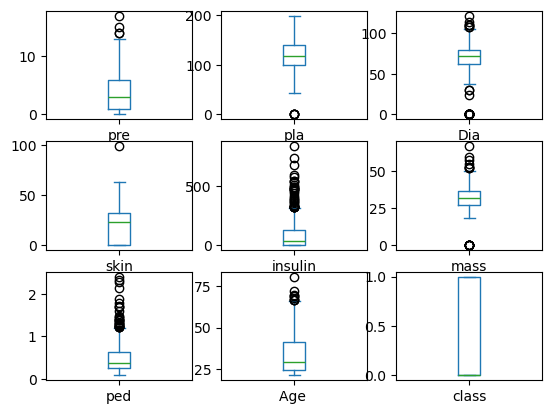

In [12]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False , sharey=False)
plt.show()

           pre    pla    Dia   skin  insulin   mass    ped   Age   class
pre      1.000  0.129  0.141 -0.082   -0.074  0.018 -0.034  0.544  0.222
pla      0.129  1.000  0.153  0.057    0.331  0.221  0.137  0.264  0.467
Dia      0.141  0.153  1.000  0.207    0.089  0.282  0.041  0.240  0.065
skin    -0.082  0.057  0.207  1.000    0.437  0.393  0.184 -0.114  0.075
insulin -0.074  0.331  0.089  0.437    1.000  0.198  0.185 -0.042  0.131
mass     0.018  0.221  0.282  0.393    0.198  1.000  0.141  0.036  0.293
ped     -0.034  0.137  0.041  0.184    0.185  0.141  1.000  0.034  0.174
Age      0.544  0.264  0.240 -0.114   -0.042  0.036  0.034  1.000  0.238
class    0.222  0.467  0.065  0.075    0.131  0.293  0.174  0.238  1.000


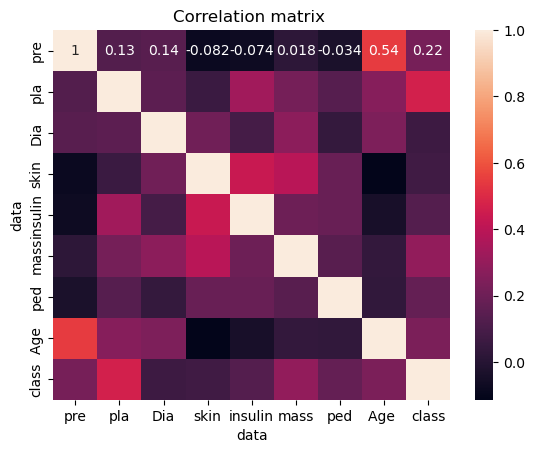

In [13]:
 
correlation = data.corr (method='pearson')
print(correlation)
heatmap = sns. heatmap(correlation, annot = True)  
heatmap.set (xlabel = 'data',ylabel = 'data', title = "Correlation matrix ")  
plt.show()

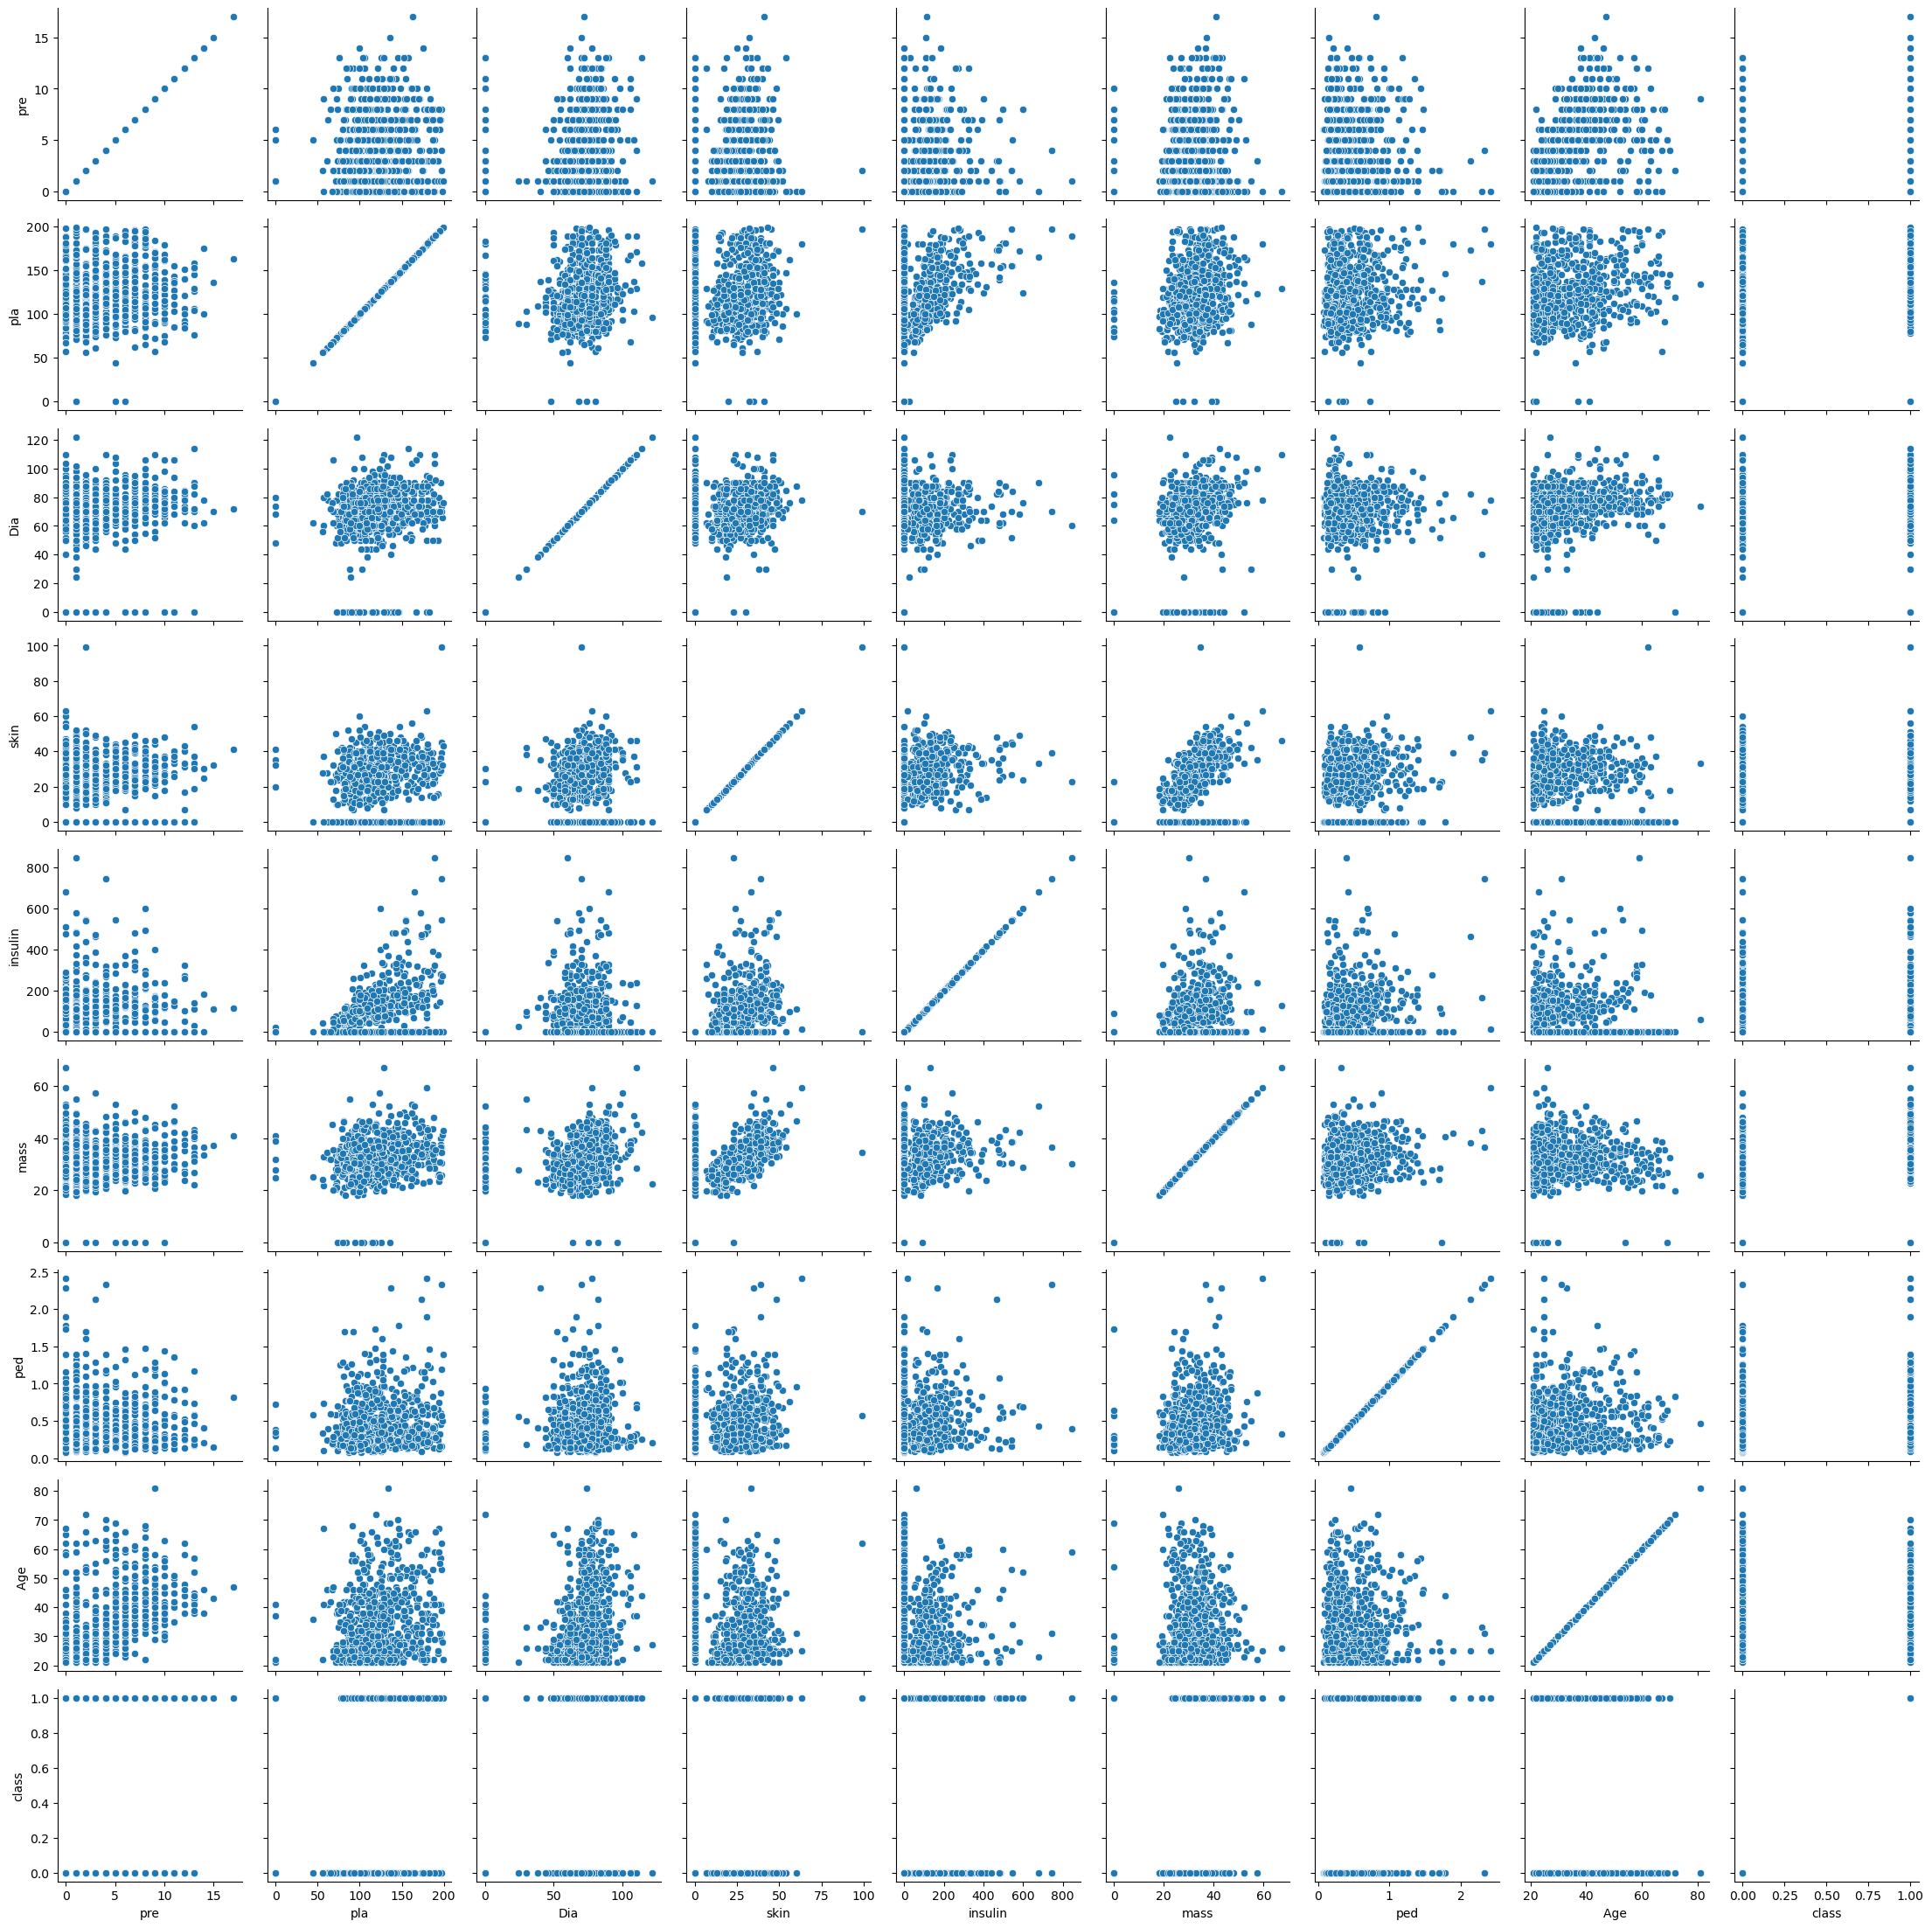

In [14]:
g = sns.PairGrid(data)
g.map(sns.scatterplot)

In [15]:
from numpy import arange
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, :-1])




In [17]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, data['class'])
print("PCA bileşenleri ve açıklanan varyans oranı:")
print(pca.components_)
print(pca.explained_variance_ratio_)

print("\nLDA öznitelik ağırlıkları:")
print(lda.scalings_)
data.head()


PCA bileşenleri ve açıklanan varyans oranı:
[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]
[0.26179749 0.21640127]

LDA öznitelik ağırlıkları:
[[ 0.31607552]
 [ 0.86226241]
 [-0.20560649]
 [ 0.01122858]
 [-0.09477594]
 [ 0.4756584 ]
 [ 0.22222693]
 [ 0.14043251]]


,pre,pla,Dia,skin,insulin,mass,ped,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Öznitelik isimleri
feature_names = data.columns[:-1]

# PCA bileşenlerinin mutlak değerlerini ve açıklanan varyans oranlarını al
pca_abs_components = np.abs(pca.components_)
pca_explained_variance_ratio = pca.explained_variance_ratio_

# LDA öznitelik ağırlıklarını al
lda_abs_scalings = np.abs(lda.scalings_)

# En ayırt edici öznitelikleri belirleme
print("PCA için en ayırt edici öznitelikler:")
for i in range(len(pca_abs_components)):
    most_important_feature = feature_names[np.argmax(pca_abs_components[i])]
    explained_variance = pca_explained_variance_ratio[i]
    print(f"Bileşen {i+1}: {most_important_feature} ({explained_variance:.2f} açıklanan varyans)")

print("\nLDA için en ayırt edici öznitelikler:")
most_important_feature = feature_names[np.argmax(lda_abs_scalings)]
print(f"LDA öznitelik ağırlıkları: {most_important_feature}")

PCA için en ayırt edici öznitelikler:
Bileşen 1: mass (0.26 açıklanan varyans)
Bileşen 2: Age  (0.22 açıklanan varyans)

LDA için en ayırt edici öznitelikler:
LDA öznitelik ağırlıkları: pla


In [19]:


# PCA'dan gelen bileşenler
pca_components = pca.components_
y=data['class']
# PCA bileşenlerini veri setine ekleyerek dönüştürme
transformed_data = pd.DataFrame(X_pca, columns=['PCA_Component_1', 'PCA_Component_2'])
transformed_data['Target'] = y  # Hedef değişkeni ekleyin, eğer varsa

# Ana veri setine PCA uygulanmış transformasyon öznitelik matrisini ekleyin
data_with_pca = pd.concat([data, transformed_data], axis=1)

# Sonuçları gösterin
print("PCA Uygulanmış Veri Seti:")
print(data_with_pca.head())

PCA Uygulanmış Veri Seti:
   pre  pla  Dia  skin  insulin  mass    ped  Age   class  PCA_Component_1  \
0    6  148   72    35        0  33.6  0.627    50      1            1.069   
1    1   85   66    29        0  26.6  0.351    31      0           -1.122   
2    8  183   64     0        0  23.3  0.672    32      1           -0.396   
3    1   89   66    23       94  28.1  0.167    21      0           -1.116   
4    0  137   40    35      168  43.1  2.288    33      1            2.359   

   PCA_Component_2  Target  
0            1.235       1  
1           -0.734       0  
2            1.596       1  
3           -1.271       0  
4           -2.185       1  


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
array=data.values
X=array[:,0:8]
Y=array[:,8]
test_size=0.3
seed=7
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
# Çoklu Doğrusal Regresyon
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg_coef = lin_reg.coef_
print("\n3. Çoklu Doğrusal Regresyon Katsayıları:")
print(lin_reg_coef)


NameError: name 'data' is not defined

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
test_size=0.3
seed=7
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=800)
log_reg.fit(X_train, Y_train)
log_reg_coef = log_reg.coef_
print("\nMultinominal Lojistik Regresyon Katsayıları:")
print(log_reg_coef)



Multinominal Lojistik Regresyon Katsayıları:
[[ 0.06435145  0.01685964 -0.00778032  0.0021327  -0.00062188  0.046618
   0.58808048  0.00810123]]


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
# Çoklu Doğrusal Regresyon
lin_reg_y_pred = lin_reg.predict(X_test)
# Multinominal Lojistik Regresyon
log_reg_y_pred = log_reg.predict(X_test)
# Çoklu Doğrusal Regresyon performans metrikleri
lin_reg_mse = mean_squared_error(Y_test, lin_reg_y_pred)
lin_reg_r2 = r2_score(Y_test, lin_reg_y_pred)
# Multinominal Lojistik Regresyon performans metrikleri
log_reg_mse = mean_squared_error(Y_test, log_reg_y_pred)
log_reg_r2 = r2_score(Y_test, log_reg_y_pred)

# Sonuçları yazdırma
print("Çoklu Doğrusal Regresyon Performansı:")
print("Mean Squared Error:", lin_reg_mse)
print("R-squared:", lin_reg_r2)

print("\nMultinominal Lojistik Regresyon Performansı:")
print("Mean Squared Error:", log_reg_mse)
print("R-squared:", log_reg_r2)


Çoklu Doğrusal Regresyon Performansı:
Mean Squared Error: 0.1643235982889679
R-squared: 0.28988730739410296

Multinominal Lojistik Regresyon Performansı:
Mean Squared Error: 0.22077922077922077
R-squared: 0.04591836734693877


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(Y_test, log_reg_y_pred)
conf_matrix = confusion_matrix(Y_test, log_reg_y_pred)
class_report = classification_report(Y_test, log_reg_y_pred)
print("Multinominal Lojistik Regresyon Sınıflandırma Modeli Performansı:")
print("Doğruluk (Accuracy):", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Multinominal Lojistik Regresyon Sınıflandırma Modeli Performansı:
Doğruluk (Accuracy): 0.7792207792207793

Confusion Matrix:
[[130  17]
 [ 34  50]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.84       147
         1.0       0.75      0.60      0.66        84

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



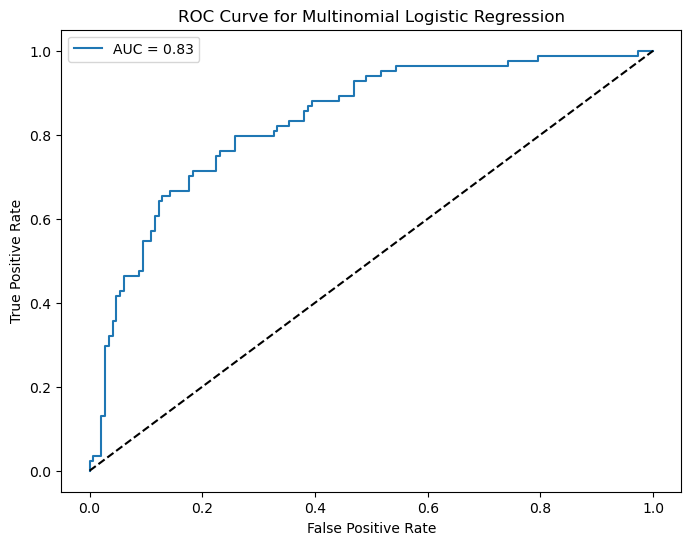

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Test verisi üzerinde sınıf olasılıklarını elde etme
y_proba = log_reg.predict_proba(X_test)[:, 1]  # 1. sınıf olasılıklarını alır

# ROC eğrisini oluşturma
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

# AUC hesaplama
auc = roc_auc_score(Y_test, y_proba)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Rasgele sınıflandırma için referans çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Logistic Regression')
plt.legend()
plt.show()

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, Y_train)

# Test veri seti üzerinde tahmin yapma
y_pred = tree_classifier.predict(X_test)

# Model performansını değerlendirme
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

# Sonuçları yazdırma
print("Karar Ağacı Sınıflandırma Modeli Performansı:")
print("Doğruluk (Accuracy):", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


NameError: name 'X_train' is not defined

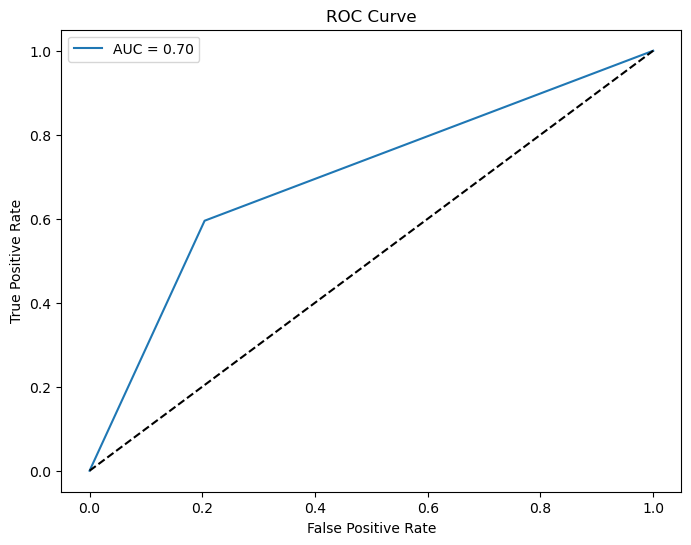

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Test verisi üzerinde sınıf olasılıklarını elde etme
y_proba =tree_classifier.predict_proba(X_test)[:, 1]  # 1. sınıf olasılıklarını alır

# ROC eğrisini oluşturma
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

# AUC hesaplama
auc = roc_auc_score(Y_test, y_proba)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Rasgele sınıflandırma için referans çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

# Test veri seti üzerinde tahmin yapma
y_pred = nb_classifier.predict(X_test)

# Model performansını değerlendirme
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

# Sonuçları yazdırma
print("Naive Bayes Sınıflandırıcı Modeli Performansı:")
print("Doğruluk (Accuracy):", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Naive Bayes Sınıflandırıcı Modeli Performansı:
Doğruluk (Accuracy): 0.7402597402597403

Confusion Matrix:
[[116  31]
 [ 29  55]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79       147
         1.0       0.64      0.65      0.65        84

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



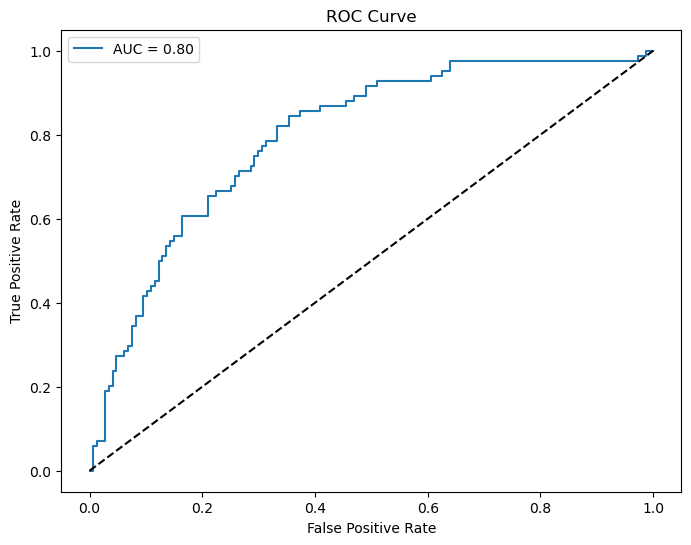

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Test verisi üzerinde sınıf olasılıklarını elde etme
y_proba = nb_classifier.predict_proba(X_test)[:, 1]  # 1. sınıf olasılıklarını alır

# ROC eğrisini oluşturma
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

# AUC hesaplama
auc = roc_auc_score(Y_test, y_proba)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Rasgele sınıflandırma için referans çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()